# Argentina stats on novel COVID-19 pandemic #

#### The following notebook is based on https://worldometers.info data and https://github.com/CSSEGISandData data. COVID-19 is currently a global pandemic affecting 158 countries and territories around the world. 
#### The objective of this notebook is to provide updated information on Argentina's COVID-19 cases comparing it to other countries of the region and the world, and provide some statistical analysis on them.

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

confirmed_cases = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
recovered_cases = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")
death_cases     = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")

Argentina data will be recovered from sources in https://www.argentina.gob.ar/coronavirus/informe-diario as it contemplates more updated data, and is more specific than other data. Other data will be used for comparison.

In [116]:
arg_confirmed_cases = pd.read_csv("argentina_covid_19_data/argentina-Confirmed.csv", encoding = "ISO-8859-1")
arg_recovered_cases = pd.read_csv("argentina_covid_19_data/argentina-Recovered.csv", encoding = "ISO-8859-1")
arg_death_cases     = pd.read_csv("argentina_covid_19_data/argentina-Deaths.csv", encoding = "ISO-8859-1")

In [117]:
arg_confirmed = arg_confirmed_cases.loc[(arg_confirmed_cases['Country/Region'] == 'Argentina') 
                & (arg_confirmed_cases['Province/State'] == 'All')]

arg_confirmed = arg_confirmed.drop(['Province/State'], axis=1)
arg_confirmed = arg_confirmed.set_index('Country/Region')

total = 0
total_list = []
for index, rows in arg_confirmed.iterrows():
    for date, cases in rows.items():
        total += cases
        total_list.append({date: total})

tot_cases = np.diag(pd.DataFrame(total_list))
arg_confirmed_ts = arg_confirmed.copy()

i = 0
for index, rows in arg_confirmed_ts.iterrows():
    print(index)
    for date, cases in rows.items():
        arg_confirmed_ts.at[index, date] = tot_cases[i]
        i += 1
    
tot_days = np.size(arg_confirmed_ts, axis = 1)
arg_confirmed_ts

Argentina


,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
Country/Region,,,,,,,,,,,,,,,,
Argentina,1,1,2,8,9,12,17,19,21,31,34,45,56,65,78,97


In [118]:
from IPython.display import Markdown

Markdown("""
Argentina's outbreak started at 03/03/2020, when the first case was confirmed in Ciudad de Buenos Aires. The current total is {total} 
""".format(total=total))


Argentina's outbreak started at 03/03/2020, when the first case was confirmed in Ciudad de Buenos Aires. The current total is 97 


## Argentina and other countries in the region

We will now compare Argentina and all latin-american countries in the region, to see the progress that the virus has made on the region

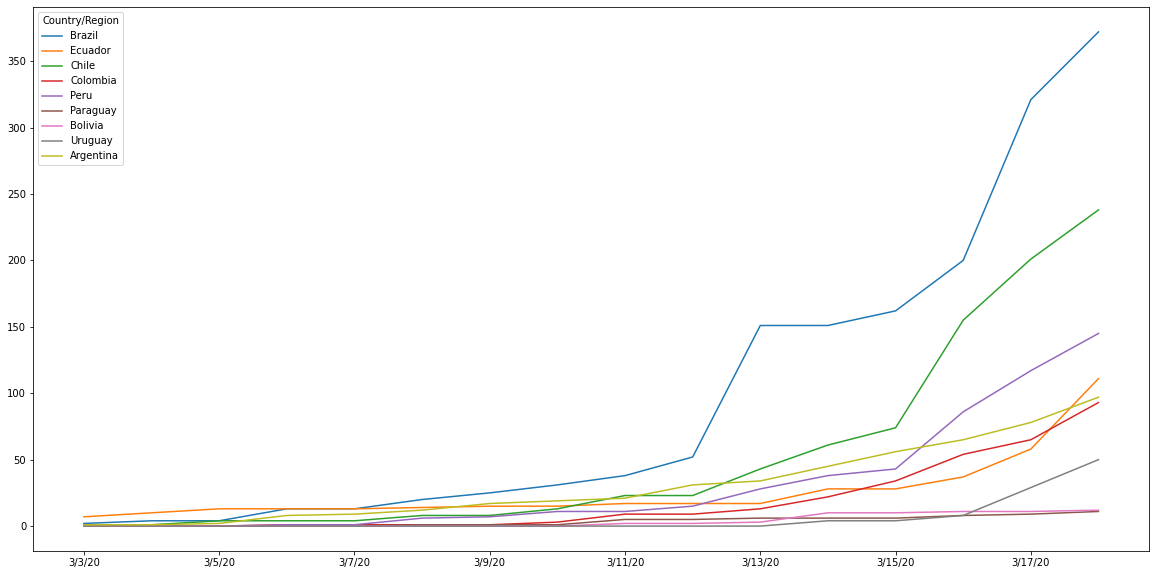

In [120]:
latam_countries = ['Brazil', 'Chile', 'Uruguay', 'Bolivia', 'Paraguay', 'Ecuador', 'Peru', 'Venezeula', 'Colombia']
latam_confirmed_cases = confirmed_cases.loc[(confirmed_cases['Country/Region']).isin(latam_countries)]

latam_confirmed_cases = latam_confirmed_cases.drop(['Province/State', 'Lat', 'Long'], axis=1)
latam_confirmed_cases = latam_confirmed_cases.set_index('Country/Region')
latam_confirmed_cases = latam_confirmed_cases.transpose()
latam_confirmed_cases = latam_confirmed_cases[41:]
latam_confirmed_cases = latam_confirmed_cases.transpose().append(arg_confirmed_ts).transpose()
latam_confirmed_cases.plot(figsize=(20,10))

#### Total confirmed cases over 1M population

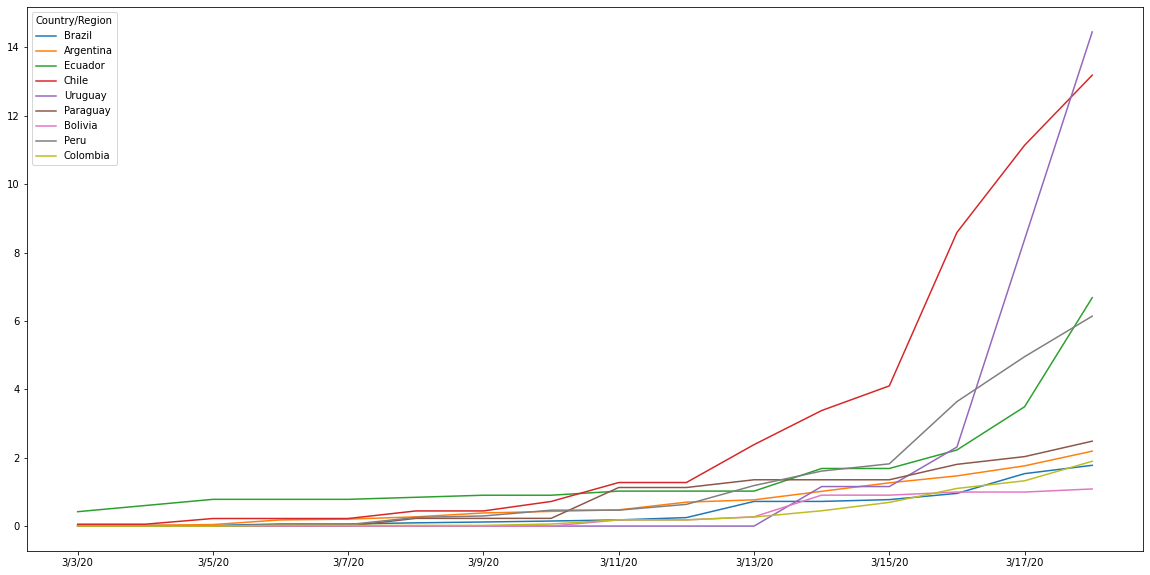

In [107]:
total_populations = {
    'Brazil': 209.3,
    'Argentina': 44.27,
    'Ecuador': 16.62,
    'Chile': 18.05,
    'Uruguay': 3.46,
    'Paraguay': 4.43,
    'Bolivia': 11.05,
    'Peru': 23.62,
    'Venezeula': 31.98,
    'Colombia': 49.07
}

latam_confirmed_cases = latam_confirmed_cases.transpose()
latam_conf_cases_by_pop = pd.DataFrame()
for country, pop in total_populations.items():
    country_cases = latam_confirmed_cases.loc[latam_confirmed_cases.index == country]
    latam_conf_cases_by_pop = latam_conf_cases_by_pop.append(country_cases.div(pop))
    
latam_conf_cases_by_pop.transpose().plot(figsize=(20,10))

## Argentina and european countries

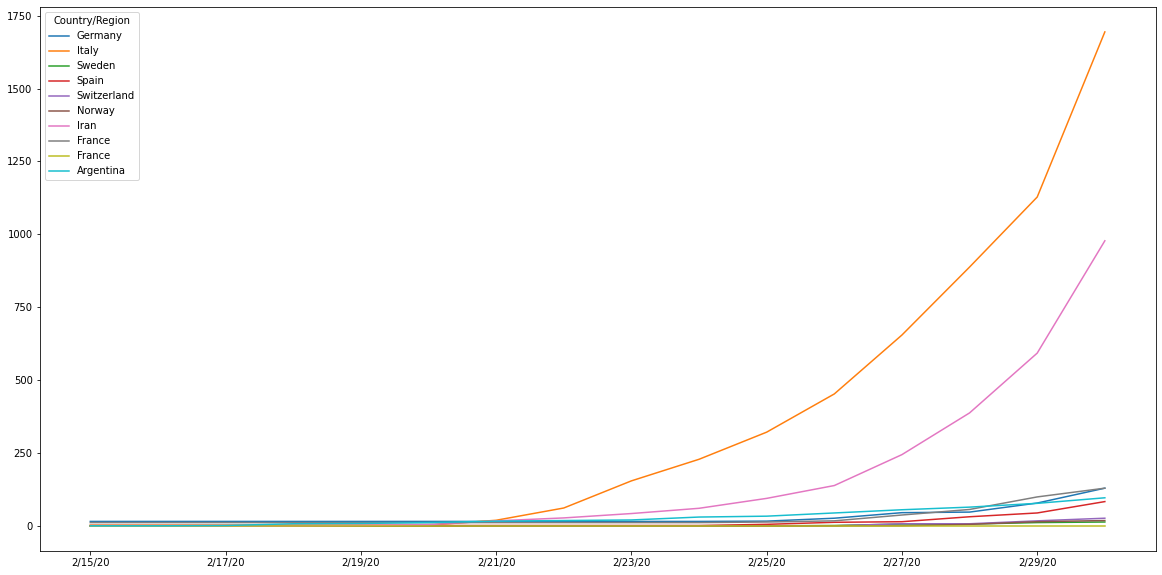

In [108]:
euro_countries = ['Italy', 'Iran', 'Spain', 'Germany', 'France', 'Switzerland', 'UK', 'Netherlands', 'Norway', 'Sweden']
euro_confirmed_cases = confirmed_cases.loc[(confirmed_cases['Country/Region']).isin(euro_countries)]
euro_confirmed_cases = euro_confirmed_cases[:9]
euro_confirmed_cases = euro_confirmed_cases.drop(['Province/State', 'Lat', 'Long'], axis = 1)
euro_confirmed_cases = euro_confirmed_cases.set_index('Country/Region')
euro_confirmed_cases = euro_confirmed_cases.transpose()

euro_confirmed_cases = euro_confirmed_cases[24:]
euro_confirmed_cases = euro_confirmed_cases.transpose().append(arg_confirmed_ts).transpose()
euro_confirmed_cases['Argentina'] = euro_confirmed_cases['Argentina'].shift(-17)
euro_confirmed_cases = euro_confirmed_cases[:tot_days]
euro_confirmed_cases.plot(figsize=(20,10))


#### Total confirmed cases over 1M population

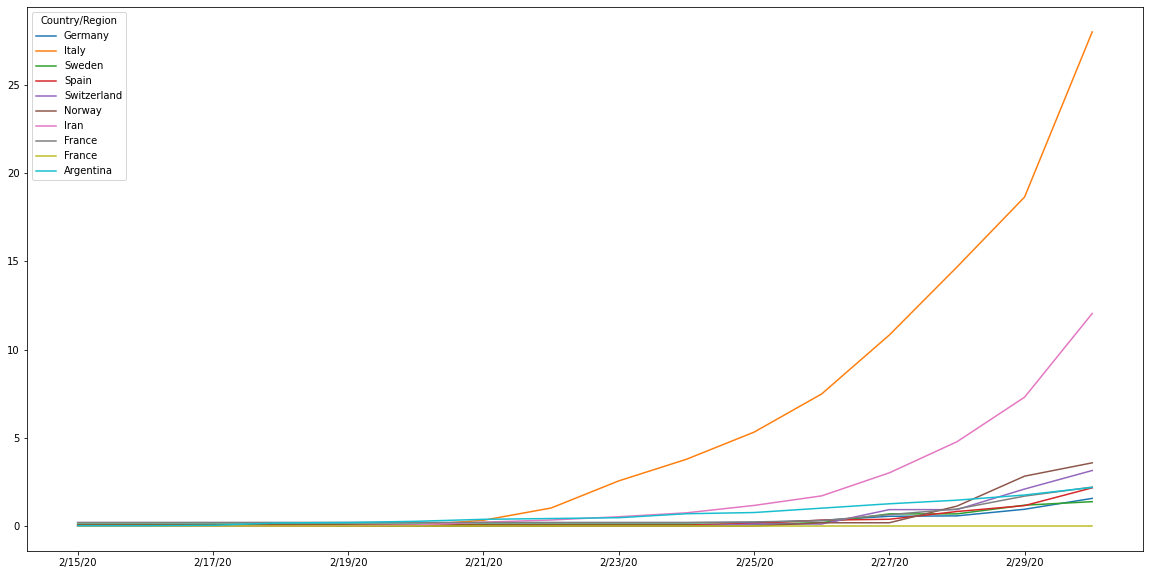

In [109]:
total_populations_eu = {
    'Germany': 82.79,
    'Italy': 60.48,
    'Sweden': 10.12,
    'Spain': 38.73,
    'Switzerland': 8.57,
    'Norway': 5.3,
    'Iran': 81.16,
    'France': 58.85,
    'Argentina': 44.27,
}

euro_confirmed_cases = euro_confirmed_cases.transpose()
euro_conf_cases_by_pop = pd.DataFrame()
for country, pop in total_populations_eu.items():
    country_cases = euro_confirmed_cases.loc[euro_confirmed_cases.index == country]
    euro_conf_cases_by_pop = euro_conf_cases_by_pop.append(country_cases.div(pop))
    
euro_conf_cases_by_pop.transpose().plot(figsize=(20,10))

## Predicting future outcomes with current data

### Incubation Period

Current data indicates that the mean incubation period is 5.2 days (95% confidence interval [CI], 4.1 to 7.0), with the 95th percentile of the distribution at 12.5 days. Data was taken from 425 confirmed cases

Source: https://www.nejm.org/doi/full/10.1056/NEJMoa2001316

If we take into account this numbers then we can try to predict when future cases will emerge, and consider different outcomes because of government actions.

See: https://www.usnews.com/news/world/articles/2020-03-15/argentina-to-close-its-borders-for-15-days-to-combat-coronavirus-president-fernandez-says
https://www.batimes.com.ar/news/argentina/argentina-to-close-schools-for-two-weeks-borders-to-visitors.phtml

Assuming a Gaussian distribution then for each day:

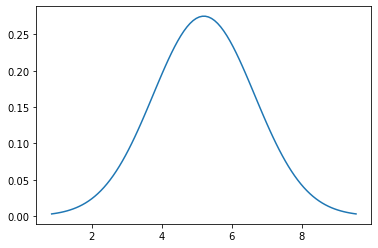

5.2 1.4500000000000002


In [110]:
import scipy.stats as stats

mu = 5.2
confirmed_cases = 425
max_mean = 7
min_mean = 4.1
sigma = (max_mean - min_mean)/2

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()
print(mu, sigma)

### Daily new cases histogram in Argentina

We now present a histogram of the daily cases in Argentina. We must then analyze this data to predict future outcomes based on the incubation period described before.

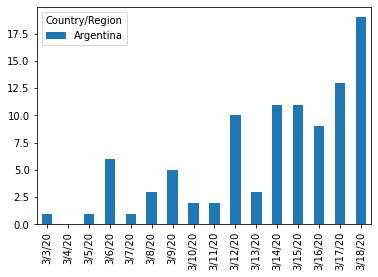

In [111]:
arg_confirmed.transpose().plot(kind="bar")

Assume the attack rate or transmissibility (Ro), which is, how rapidly the disease spreads, of 2. This represents the average number of people to which a single infected person will transmit the virus.

See: 

- https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3524675

- https://www.imperial.ac.uk/mrc-global-infectious-disease-analysis/news--wuhan-coronavirus/

### Predicting outcomes with a constant positive transmission rate greather than 1

Ending


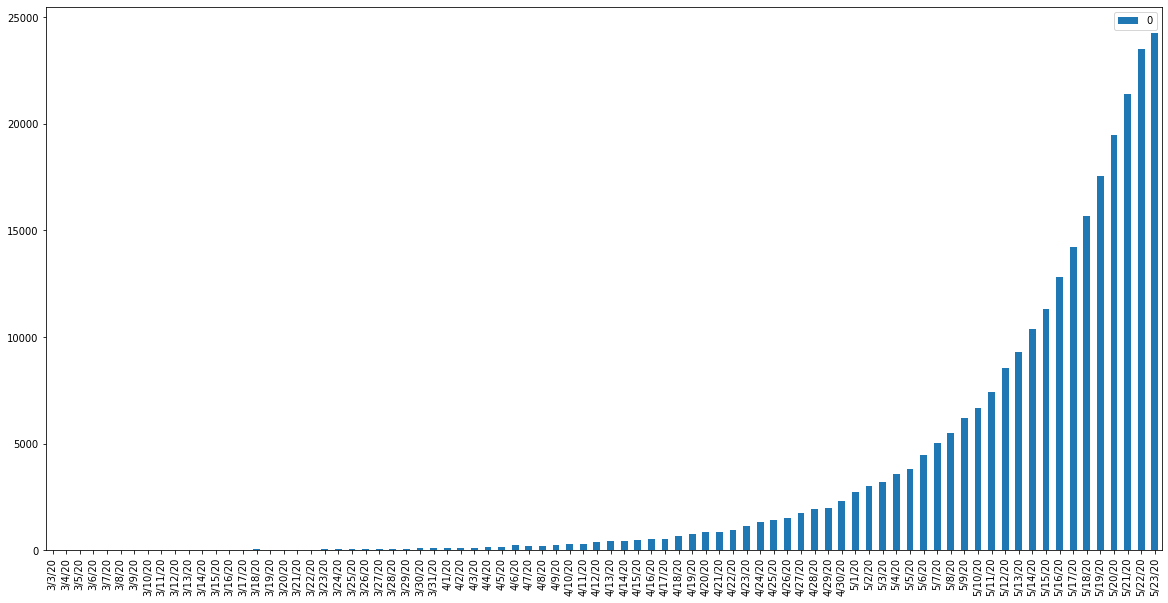

In [112]:
from datetime import datetime, timedelta
from collections import OrderedDict
from dateutil.parser import parse

def ro(curve, value = None, x = None):
    if curve == 'constant':
        # ro(x) = a
        key = "a"
        return value[key]
    elif curve == 'linear':
        # ro(x) = a*x + b
        key_1 = "a"
        key_2 = "b"
        a = value[key_1]
        b = value[key_2]
        return a*x + b
    elif curve == 'exponential':
        # ro(x) = a*exp(-bt)
        key_1 = "a"
        key_2 = "b"
        a = value[key_1]
        b = value[key_2]
        return a*np.exp(b*x)
    
def obtain_prediction(ro, ro_type, ro_value, init_date, list_dates, dict_arg_predicted, max_iter = 90, force_end = False):
    days_passed = 0
    for i in range(0, len(list_dates)):
        date = list_dates[i]
        _date = date.strftime("%-m/%-d/%y")
        if _date in dict_arg_predicted:
            new_cases = ro(ro_type, ro_value, days_passed)
            days_passed += 1
            gaussian = -1
            for __ in range(0, int(round(dict_arg_predicted[_date]))):
                gaussian = np.random.normal(mu + days_passed, sigma)
                f_day = np.ceil(gaussian)
                end_date = init_date + timedelta(f_day)
                end_date = end_date.strftime("%-m/%-d/%y")
                if end_date in dict_arg_predicted:
                    dict_arg_predicted[end_date] = new_cases + dict_arg_predicted[end_date]
                else:
                    dict_arg_predicted[end_date] = new_cases
        
        if i > max_iter and new_cases < 20:
            print("Ending")
            break
        elif i > max_iter and force_end:
            break
    return OrderedDict(sorted(dict_arg_predicted.items(), key = lambda x: parse(x[0])))

def get_clean_dict(arg_dataframe):
    dict_arg_confirmed = arg_dataframe.to_dict()
    temp = {}
    for date, cases in dict_arg_confirmed.items():
        for _, num_cases in cases.items():
            temp[date] = num_cases
    return temp

dict_arg_confirmed = get_clean_dict(arg_confirmed)

# Constrains
init_date = datetime.strptime('3/3/20', '%m/%d/%y')
list_dates = pd.date_range(init_date, periods = 2000).tolist()

dict_arg_predicted = obtain_prediction(ro, 'constant', {"a": 2}, init_date, list_dates, dict_arg_confirmed, max_iter = 75, force_end = True)

arg_predicted = pd.DataFrame([dict_arg_predicted], columns=dict_arg_predicted.keys())

#todo
length = len(dict_arg_predicted)
bins = [k for k in range(1, length)]
confirmed = list(dict_arg_confirmed.values())
predicted = list(dict_arg_predicted.values())

# Graph if ro = 2
arg_predicted.transpose()[:-8].plot(kind="bar", figsize=(20, 10))

With a constant rate of transmission, greather than 1, it is evident that the amount of cases will grow exponentially, bounded by the total population.

### Predicting outcomes with a varying transmission rate

Ending


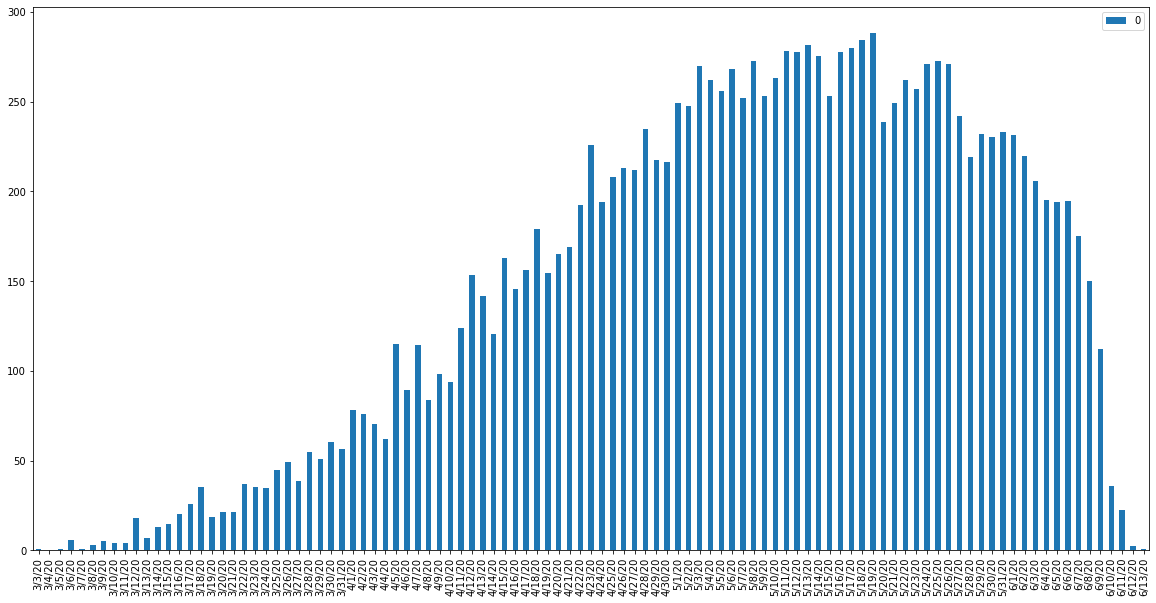

In [113]:
list_dates = pd.date_range(init_date, periods = 2000).tolist()
dict_arg_confirmed = get_clean_dict(arg_confirmed)
init_date = datetime.strptime('3/3/20', '%m/%d/%y')


dict_arg_predicted = obtain_prediction(ro, 'exponential', {"a": 2, "b": -0.01}, init_date, list_dates, dict_arg_confirmed)
arg_predicted = pd.DataFrame([dict_arg_predicted], columns=dict_arg_predicted.keys())

arg_predicted.transpose().plot(kind="bar", figsize=(20, 10))

### Finding the best exponential fit for current data

There are multiple models that could simulate the virus propagation, our task is to find the best model for the current known data.